# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [63]:
import pandas as pd
import numpy as np
#Part 1

df = pd.read_csv('./data/airbnb_hw.csv')

df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'])

missing_price = df['Price'].isna().sum()
print("Missing values in Price:", missing_price)

# I noticed that most of the numbers were fine, so I converted them into numeric strings just to make sure. But, when I checked over this list, I saw that some of the values were inside quotation marks, so I replaced the comma inside of them to make the data as clean as possible. There are 0 missing values now.
# Also, I did use AI here to help explain exactly what I was supposped to do, I was kinda confused what it wanted as the data looked ok but it told me to look deeper and I did.

#Part 2

df = pd.read_csv('./data/mn_police_use_of_force.csv')

df['subject_injury'] = df['subject_injury'].astype(str)
missing_values = df['subject_injury'].isna().sum()
df['subject_injury'].value_counts(dropna=False)
missing = df['subject_injury'].isna().sum()
total = len(df)
print("Proportion Missing", missing/total)
cross = pd.crosstab(df['force_type'], df['subject_injury'], dropna=False)
print(cross)

#Around 0.76 or 76% is missing from the data. There isn't a major trend with where the NA's are, except all the less lethal ones are Na.

# Part 3

df = pd.read_parquet('./data/justice_data.parquet')
df["WhetherDefendantWasReleasedPretrial"] = pd.to_numeric(df['WhetherDefendantWasReleasedPretrial'])
df["WhetherDefendantWasReleasedPretrial"] = df["WhetherDefendantWasReleasedPretrial"].replace(9, np.nan)
print(df["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False))

# Part 4

df = pd.read_parquet('./data/justice_data.parquet')
df["ImposedSentenceAllChargeInContactEvent"] = pd.to_numeric(df["ImposedSentenceAllChargeInContactEvent"], errors="coerce")
print(df["ImposedSentenceAllChargeInContactEvent"].value_counts(dropna=False))

## I noticed that when SentenceTypeAllChargesAtConvictionInContactEvent was a 4 or a 9 that the original variable was false blank, meaning that there was a major reason for having this blank values. I took out all of those values, as well as the possibly error decimals, and converted them all into NaN values.
# A decent bit of the values were decimaled, such as 0.985626, but because of the sheer number of these values, it makes them necessary to keep.


Missing values in Price: 0
Proportion Missing 0.7619342359767892
subject_injury                 No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985
WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64
ImposedSentenceAllChargeInContactEvent
NaN           9053
0.000000      4953
12.000000     1404
0.985626      1051
6.000000       809
              ... 
960.000000       1
2.365503         1
116.000000       1
19.513347        1
1.65708

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Year
NaN       1526
2015.0     143
2017.0     138
2016.0     130
2011.0     128
          ... 
1979.0      25
1978.0      25
1940.0      24
1945.0      16
2020.0      10
Name: count, Length: 82, dtype: int64
Male Proportion: 0.8439620081411127
Proportion Unprovoked: 0.8883028818986627
Fatal: 0.2398972602739726
Proportion of white shark attacks: 0.10523057876818323


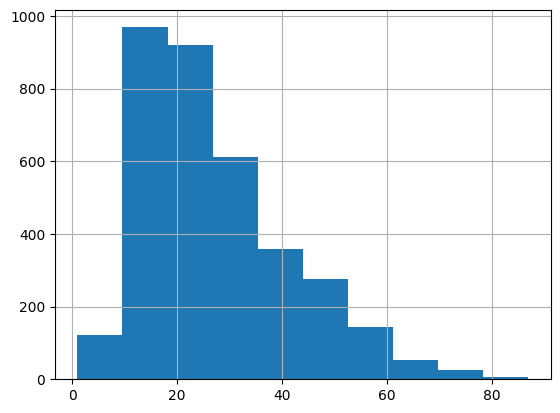

In [66]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/sharks.csv', low_memory=False)

df = df.replace("", np.nan)

df.columns = df.columns.str.strip()
df = df.dropna(axis=1, how="all")

df['Year'] = pd.to_numeric(df['Year'])
df["Year"] = df["Year"].replace(0.0, np.nan)
df["Year"] = df["Year"].where(df["Year"].between(1940, 2025))
print(df['Year'].value_counts(dropna=False))
# I see a range from 1940-2017, very much increases in recent times, as before 2000 the amount of shark attacks was only 2 digits, but most years in 2010's are 3 digits.

df['Age'] = pd.to_numeric(df['Age'],errors="coerce")
df["Age"] = df["Age"].replace(0.0, np.nan)
df["Age"].hist()

df = df.rename(columns={"Unnamed: 9": "Sex"})
df["Sex"] = df["Sex"].str.lower().replace({"male": "Male","female": "Female","boy": "Male","girl": "Female","m": "Male","f": "Female"})
df["Sex"] = df["Sex"].fillna(df["Name"].str.lower().replace({"male": "Male","female": "Female","boy": "Male","girl": "Female","m": "Male","f": "Female"}))
known = df["Sex"].dropna()
male_count = (known == "Male").sum()
female_count = (known == "Female").sum()
print("Male Proportion:", male_count / (male_count + female_count))
# Around 84% of the attacks were on males, a lot of values were given under other names, or not given at all, therefore had to be excluded.

df["Type"] = df["Type"].str.strip().str.title()
df["Type"] = df["Type"].where(df["Type"].isin(["Provoked", "Unprovoked"]), "Unknown")
unprovoked_prop = (df["Type"] == "Unprovoked").sum()
provoked_prop = (df["Type"] == "Provoked").sum()
print("Proportion Unprovoked:", unprovoked_prop/(unprovoked_prop + provoked_prop))
# Around 88% were Unprovoked after the data has been cleaned

df["Fatal (Y/N)"] = df["Fatal (Y/N)"].str.strip().str.title()
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].where(df["Fatal (Y/N)"].isin(["Y", "N"]), "Unknown")
fatal = (df["Fatal (Y/N)"] == "Y").sum()
unfatal = (df["Fatal (Y/N)"] == "N").sum()
print("Fatal:", fatal/(fatal + unfatal))
# It seems that the majority of shark attacks are unprovoked, on males, and not fatal. Personally, I don't really think sharks are that deadly, they normally kill less in a year than vending machines do.

df["Species"] = df["Species"].astype(str)
prop_white = df["Species"].str.contains("White", case=False, na=False).mean()
print("Proportion of white shark attacks:", prop_white)
# About 0.105 of shark attacks on average are done by white sharks.

# Used AI to help me understand the questions and fix small errors, did not use it to write the code for me (Chat GPT)


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper will discuss data tidying, it helps to make specific set tables to help and make data that was messy at first less messy, and it's very easy compared to other methods of data cleaning.
2. Tidy data is intended to make the data faciliate analysis by organizing this specific data into a unique way to make it more helpful to read. It's used to simplify the data, make it easier to read, and therefore help improve the analytic process used on said data.
3. Every family itself has a similar structure to another family, but each family is unique and can have its own set of problems as well as solutions. You can exactly tell what is happening in said dataset or a family, seeing if there's an x var or a y var, but being able to define it in a way that can be used in future data tidying, or even just writing about the data, can be really difficult, as it can be defined in many different ways or meaning that makes it super complicated.
4. Variables contain values that measure attributes. A dataset is a collection of these values, that are in formats such as an interger, float, string, or others. Values go directly into variables, but they are also set by observations. These observations have values directly recorded from them, and these values go into the variables, which make up the entire dataset.
5. Variables are the columns of the table, Observations found in the data are put into rows, and numbers are inputted based on these 2. With a formation of the Variables and Observations, tables are formed that showcase all of the data.
6. Column headers being ! variable names; Variables getting packed into the same column; Variables going into rows instead of just columns, Multiple Observation Units going into the same table; and one unit in multiple table, or the opposite of the previous statement. These problems can expand and make data messy.
7. Table 11 is messy due to the amount of empty space that occurs. Many indices are not necessary due to only having some observations in certain places, and therefore condensing it into a tidy or molten table is key. Table 12 is molten because it has 2 observations for each location, with a max and min being listed in the rows. But, the other table simplifies this, and makes 2 columns just for the max and min values, shorting the amount of columns by half.
8. If the data given by tidy cleaning is only as useful as it's tools, it just means that they will be linked in a negative way where workflow will never improve. In the future, he hopes to use methods to improve cognitive data analysis, futher improve these tools, and get a better development of tidy data.